## __Dense MNIST experiment:__
<font size=3>

Let's now make two experiments with our best dense model for MNIST handwritten digits problem:
* __Experiment I:__ Select a digit image for prediction and rotate it 90°;
* __Experiment II:__ Select a digit image for prediction and make the negative version of this image.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from toolbox import load_mnist, dense_mnist

2024-11-14 12:28:43.758918: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-14 12:28:44.754468: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### __1. Import the dataset:__

In [2]:
(x_train, y_train), (x_val, y_val), (x_test, y_test) = load_mnist()

print(f"x-train:{x_train.shape}, x-val:{x_val.shape}, x-test:{x_test.shape}")
print(f"y-train:{y_train.shape}, y-val:{y_val.shape}, y-test:{y_test.shape}")

x-train:(48000, 784), x-val:(12000, 784), x-test:(10000, 784)
y-train:(48000, 10), y-val:(12000, 10), y-test:(10000, 10)
x-train:(48000, 784), x-val:(12000, 784), x-test:(10000, 784)
y-train:(48000, 10), y-val:(12000, 10), y-test:(10000, 10)


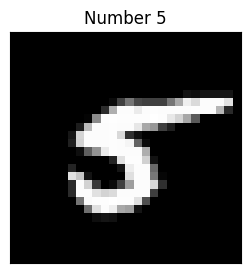

In [3]:
# visualizing handwritten digits:
i = 6
label = np.argmax(y_train[i])
digit = np.reshape(x_train[i], (28, 28))

plt.figure(figsize=(5,3))
plt.title("Number "+str(label))
plt.imshow(digit, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

### __2. Import the model:__

In [4]:
model = dense_mnist()

model.load_weights("../weights/dense_mnist.weights.h5")

2024-11-14 12:28:46.997931: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


### __3. Make prediction:__

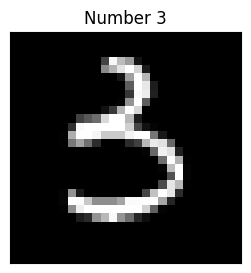

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Prediction: 3


In [5]:
# visualizing handwritten digits:
i = 0
label = np.argmax(y_train[i])
digit = np.reshape(x_train[i], (28, 28))

plt.figure(figsize=(5,3))
plt.title("Number "+str(label))
plt.imshow(digit, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

x = np.expand_dims(x_train[i], axis=0)
pred = model.predict(x)

print("Prediction:", np.argmax(pred))

### __4. The experiments:__
#### __4.1 Image rotation__

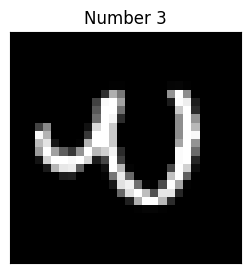

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Prediction: 4


In [6]:
# visualizing handwritten digits:
i = 0
label = np.argmax(y_train[i])
digit = np.reshape(x_train[i], (28, 28))

digit_new = digit.T

plt.figure(figsize=(5,3))
plt.title("Number "+str(label))
plt.imshow(digit_new, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

x = np.reshape(digit_new, (1, 28*28))

pred = model.predict(x)

print("Prediction:", np.argmax(pred))

#### __4.2 Negative image__

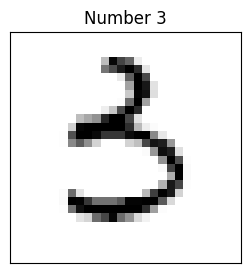

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction: 2


In [7]:
digit = np.reshape(x_train[i], (28, 28))

digit_new = digit.max() - digit

plt.figure(figsize=(5,3))
plt.title("Number "+str(label))
plt.imshow(digit_new, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

x = np.reshape(digit_new, (1, 28*28))

pred = model.predict(x)

print("Prediction:", np.argmax(pred))